In [6]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

## Q1) Train a k-NN model on the training set

In [7]:
test_data = pd.read_csv('ann-test.data', sep=' ', header=None)
train_data = pd.read_csv('ann-train.data', sep=' ', header=None)

test_data = test_data.drop([22, 23], axis = 1)
train_data = train_data.drop([22, 23], axis = 1)
test_data.iloc[:, -1].replace({2: 0, 1:0}, inplace=True)
train_data.iloc[:, -1].replace({2: 0, 1:0}, inplace=True)
test_data.iloc[:, -1].replace({3: 1}, inplace=True)
train_data.iloc[:, -1].replace({3: 1}, inplace=True)

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.028,0.111,0.131,0.085,0
1,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0013,0.019,0.084,0.078,0.107,1
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0000,0.031,0.239,0.100,0.239,1
3,0.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0010,0.018,0.087,0.088,0.099,1
4,0.22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.0004,0.022,0.134,0.135,0.099,1


[[  65  185]
 [  28 3150]]


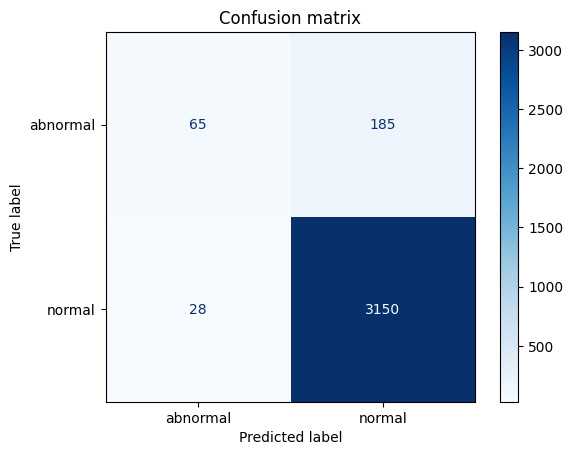

In [8]:
k = 3
X_test = test_data.iloc[:, : -1]
y_test = test_data.iloc[:, -1]
X_train = train_data.iloc[:, : -1]
y_train = train_data.iloc[:, -1]

clf = KNeighborsClassifier(k).fit(X_train, y_train)

y_predict = clf.predict(X_test)

#Build the confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=['abnormal', 'normal']
    )
disp.ax_.set_title("Confusion matrix")

# tn, fp], fn, tp = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test, y_predict))


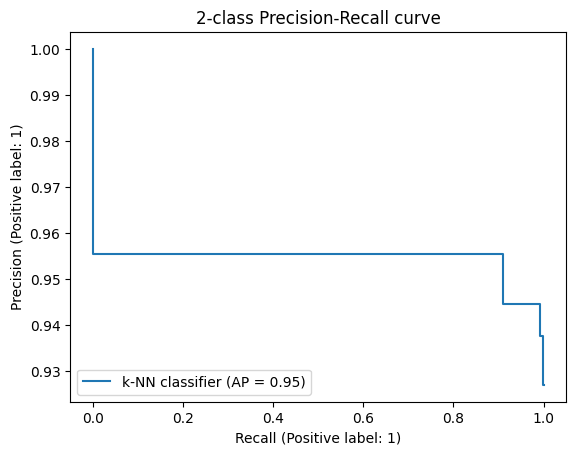

In [9]:
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="k-NN classifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

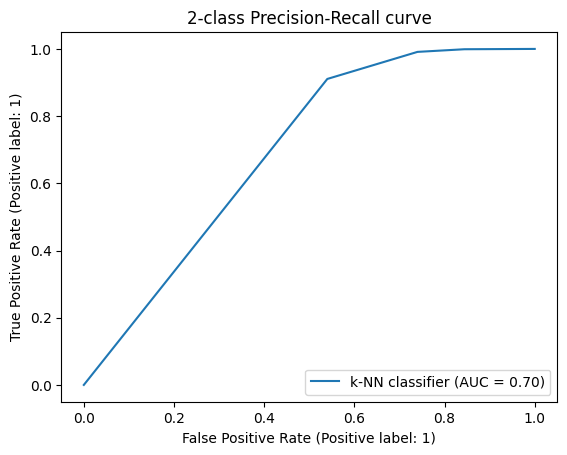

In [11]:
display = RocCurveDisplay.from_estimator(
    clf, X_test, y_test, name="k-NN classifier"
)
_ = display.ax_.set_title("2-class ROC curve")                               

## Q2) Attempt to reproduce Example 4.5 from the textbook

- Convert the data into a binary classification problem. 
- Train a logistic regression model on the training data.
- Evaluate the trained model to calculate a confusion matrix.
- Vary  the  decision  threshold  for  the  model  as  done  in  Example  4.5  and  recalculate the confusion matrix

In [ ]:
#The first step is already completed, we have converted the 